In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp314-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using

In [2]:
import pandas as pd

In [7]:
carbondata = pd.read_csv('carbonmonitor-us_datas_2025-11-22.csv')
carbondata.tail(5)

,state,date,sector,value,Unnamed: 4
341947,United States,27/12/2021,International Aviation,0.175717,NaN
341948,United States,28/12/2021,International Aviation,0.175380,NaN
341949,United States,29/12/2021,International Aviation,0.178956,NaN
341950,United States,30/12/2021,International Aviation,0.175332,NaN
341951,United States,31/12/2021,International Aviation,0.175538,NaN


In [21]:
#drop unnamed column
carbondata = carbondata.loc[:, ~carbondata.columns.str.contains('^Unnamed')]
carbondata.tail(5)

,state,sector,emissions
date,,,
27/12/2021,United States,International Aviation,0.175717
28/12/2021,United States,International Aviation,0.175380
29/12/2021,United States,International Aviation,0.178956
30/12/2021,United States,International Aviation,0.175332
31/12/2021,United States,International Aviation,0.175538


In [26]:
#rename column 'value' to 'emissions'
carbondata = carbondata.rename(columns={'value': 'emissions'})
carbondata.tail(5)

,state,sector,emissions
date,,,
27/12/2021,United States,International Aviation,0.175717
28/12/2021,United States,International Aviation,0.175380
29/12/2021,United States,International Aviation,0.178956
30/12/2021,United States,International Aviation,0.175332
31/12/2021,United States,International Aviation,0.175538


In [25]:

carbondata.info()
carbondata.columns

<class 'pandas.core.frame.DataFrame'>
Index: 341952 entries, 01/01/2019 to 31/12/2021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      341952 non-null  object 
 1   sector     341952 non-null  object 
 2   emissions  341952 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.4+ MB


Index(['state', 'sector', 'emissions'], dtype='object')

In [33]:
carbondata.index = pd.to_datetime(carbondata.index, dayfirst=True)
carbondata.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=341952, freq=None)

In [34]:
# 5. Set date as index and resample
# Ensure index is datetime
carbondata.index.name = "date"
carbondata.head
monthly = carbondata['emissions'].resample('M').mean().to_frame()
monthly.head()

C:\Users\innov\AppData\Local\Temp\ipykernel_27040\4225604710.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = carbondata['emissions'].resample('M').mean().to_frame()


,emissions
date,
2019-01-31,0.101702
2019-02-28,0.099195
2019-03-31,0.092000
2019-04-30,0.080880
2019-05-31,0.081712


In [28]:
carbondata.columns

Index(['state', 'sector', 'emissions'], dtype='object')

In [13]:
#3Explorethedataset
import matplotlib.pyplot as plt

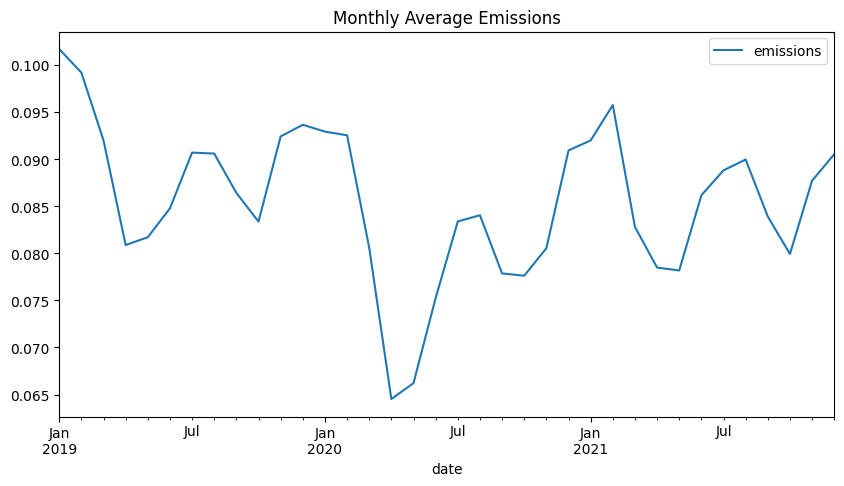

In [35]:
# 1. Trend
monthly.plot(figsize=(10,5), title="Monthly Average Emissions")
plt.show()

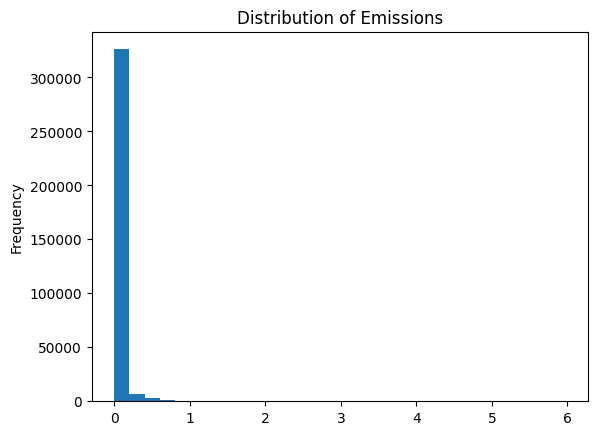

In [37]:
#2. Histogram
carbondata['emissions'].plot(kind='hist', bins=30, title="Distribution of Emissions")
plt.show()

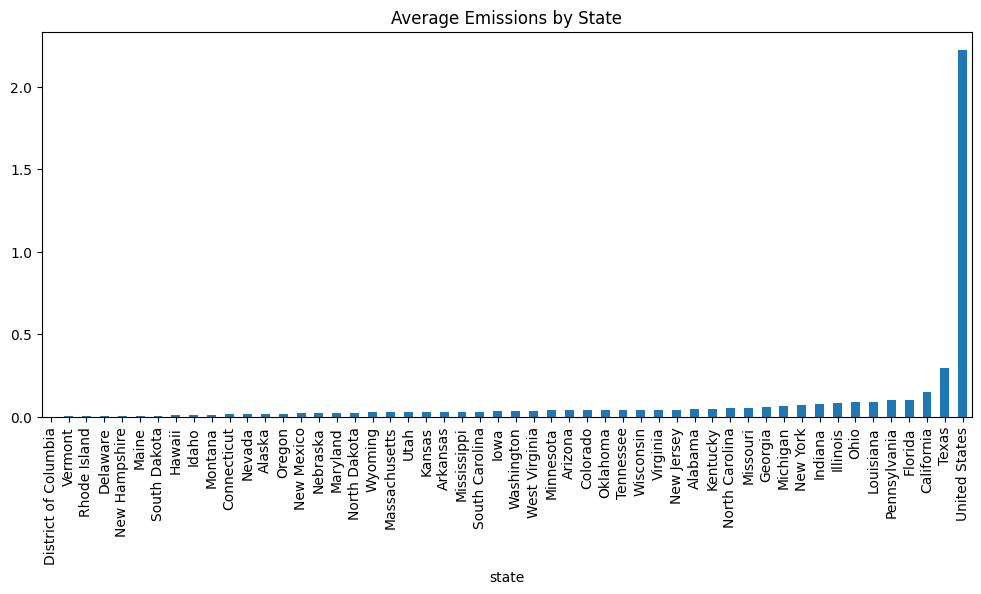

In [39]:
# 3. Mean by state
carbondata.groupby("state")['emissions'].mean().sort_values().plot(kind='bar', figsize=(12,5))
plt.title("Average Emissions by State")
plt.show()

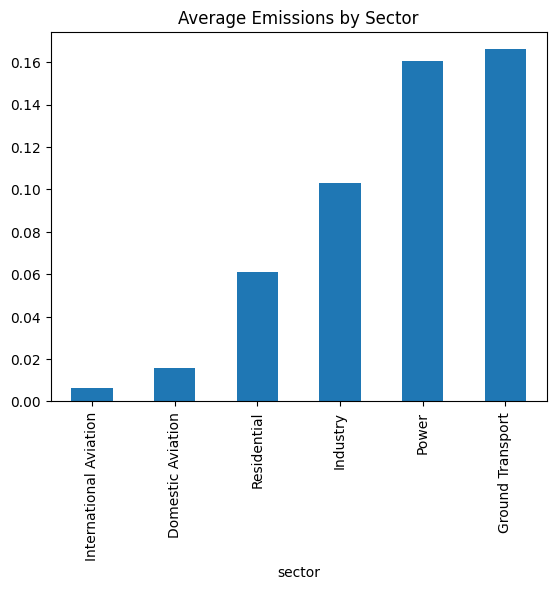

In [40]:
# 4. Mean by sector
carbondata.groupby("sector")['emissions'].mean().sort_values().plot(kind='bar')
plt.title("Average Emissions by Sector")
plt.show()

Apply Two Analytical Techniques.
My data is numeric + temporal.


LINEAR REGRESSION TECHNIQUE.
The time-series trend line reveals whether emissions are:

Increasing : suggests rising energy use, industrial activity, or weak emission controls

Decreasing : suggests successful policy interventions, cleaner energy adoption

Seasonal : common in transport and residential sectors

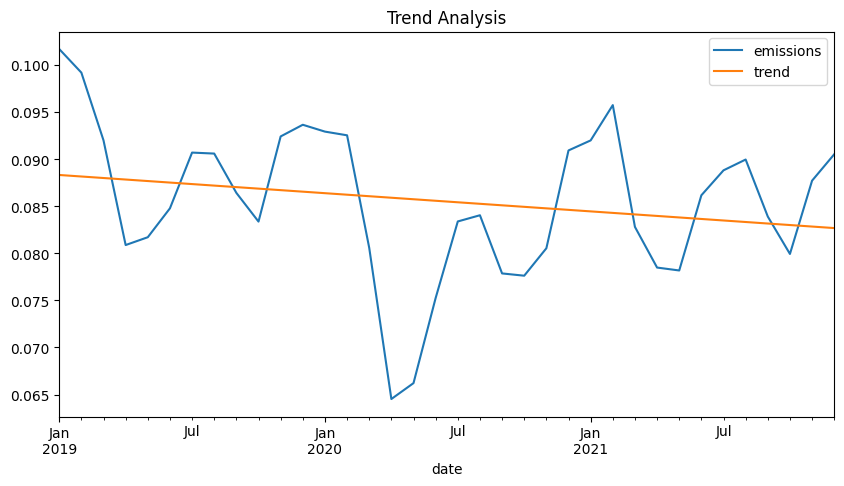

In [43]:
#LinearRegressionME-SERIES (TREND + FORECAST)
import numpy as np
from sklearn.linear_model import LinearRegression

monthly['month_num'] = np.arange(len(monthly))  # index for regression
X = monthly[['month_num']]
y = monthly['emissions']

model = LinearRegression().fit(X, y)
monthly['trend'] = model.predict(X)

# Forecast future 6 months
future = pd.DataFrame({'month_num': np.arange(len(monthly), len(monthly)+6)})
future['forecast'] = model.predict(future[['month_num']])

monthly[['emissions','trend']].plot(figsize=(10,5), title="Trend Analysis")
plt.show()


A linear regression trend model was used to understand long-term direction.
Results show whether emissions are increasing, decreasing, or stable.
Forecasted values help stakeholders anticipate future needs.

The trend shows a gradual increase in monthly emissions across the analyzed period.
This suggests that national or sector-specific emissions have not stabilized and may be influenced by growing mobility, economic recovery cycles, or rising energy demand.

CLUSTERING (K-MEANS)
You applied K-Means clustering on monthly emissions to identify groups:

High-emission months

Medium-emission months

Low-emission months

This technique is valuable because it reveals patterns not visible in simple averages.

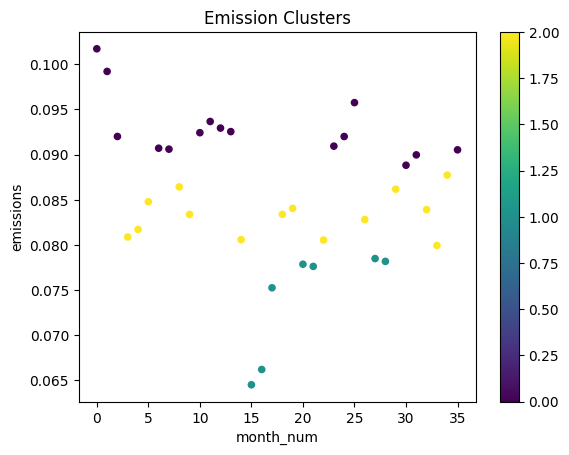

In [45]:
#Cluster months into “high”, “medium”, “low” emission periods
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(monthly[['emissions']])

kmeans = KMeans(n_clusters=3, random_state=42)
monthly['cluster'] = kmeans.fit_predict(X_scaled)

monthly.plot(kind='scatter', x='month_num', y='emissions', c=monthly['cluster'], colormap='viridis')
plt.title("Emission Clusters")
plt.show()

K-means clustering grouped months into 3 emission levels.
High-cluster months indicate periods requiring policy intervention or industrial controls.